In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Data"))

['input.csv']


In [3]:
data = pd.read_csv('../Data/input.csv')
data_visual = pd.read_csv('../Data/input.csv')

In [4]:
data.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [5]:
data.shape

(500, 4)

In [6]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [8]:
sns.__version__

'0.13.2'

In [9]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

Gender  Height  Weight  Index      Status
0    Male     174      96      4     Obesity
1    Male     189      87      2      Normal
2  Female     185     110      4     Obesity
3  Female     195     104      3  Overweight
4    Male     149      61      3  Overweight

In [10]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

Gender  Height  Weight  Index      Status  gender_lbl
0    Male     174      96      4     Obesity           1
1    Male     189      87      2      Normal           1
2  Female     185     110      4     Obesity           0
3  Female     195     104      3  Overweight           0
4    Male     149      61      3  Overweight           1

AttributeError: Text.set() got an unexpected keyword argument 'height'

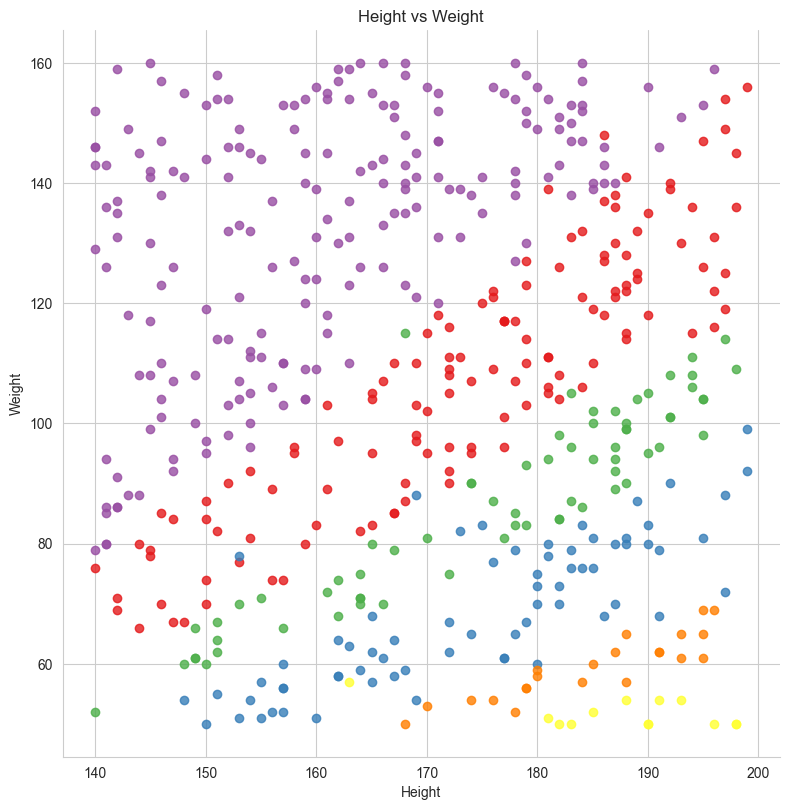

In [11]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           height = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', height=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

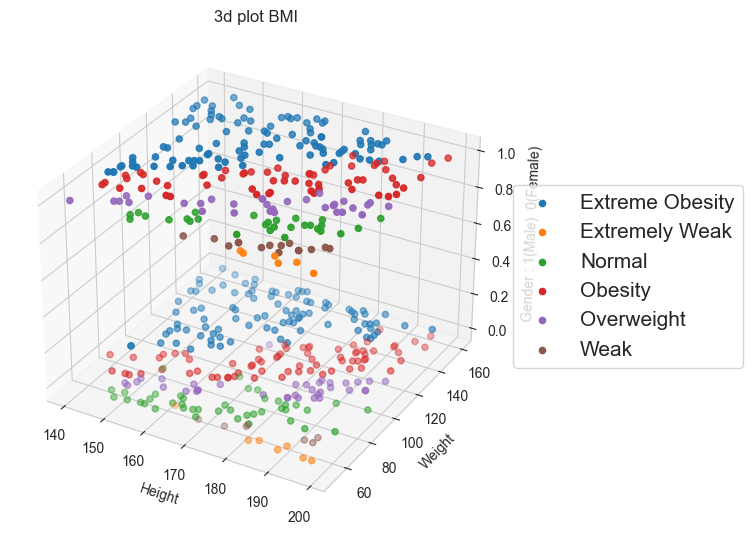

In [ ]:
groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [ ]:
people = data_visual['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Gender
Female    255
Male      245
Name: count, dtype: int64

In [ ]:
categories = data_visual['Status'].value_counts() 
categories

Status
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

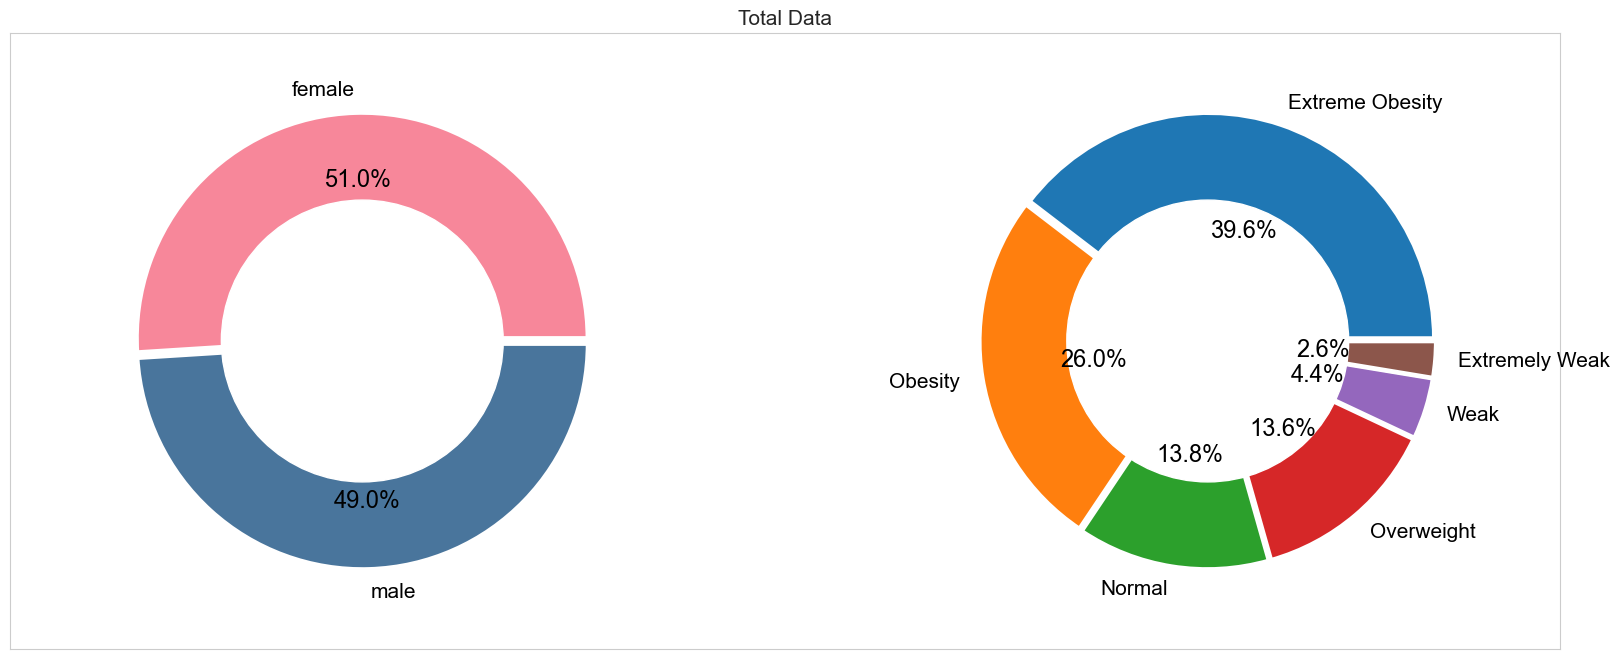

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [ ]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

Gender  Height  Weight  Index      Status  gender_lbl
2   Female     185     110      4     Obesity           0
3   Female     195     104      3  Overweight           0
9   Female     169     103      4     Obesity           0
11  Female     159      80      4     Obesity           0
12  Female     192     101      3  Overweight           0

In [ ]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.head()

Gender  Height  Weight  Index           Status  gender_lbl
0   Male     174      96      4          Obesity           1
1   Male     189      87      2           Normal           1
4   Male     149      61      3       Overweight           1
5   Male     189     104      3       Overweight           1
6   Male     147      92      5  Extreme Obesity           1

In [ ]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Status
Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: count, dtype: int64

In [ ]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Status
Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: count, dtype: int64

Text(0, 0, 'Male')

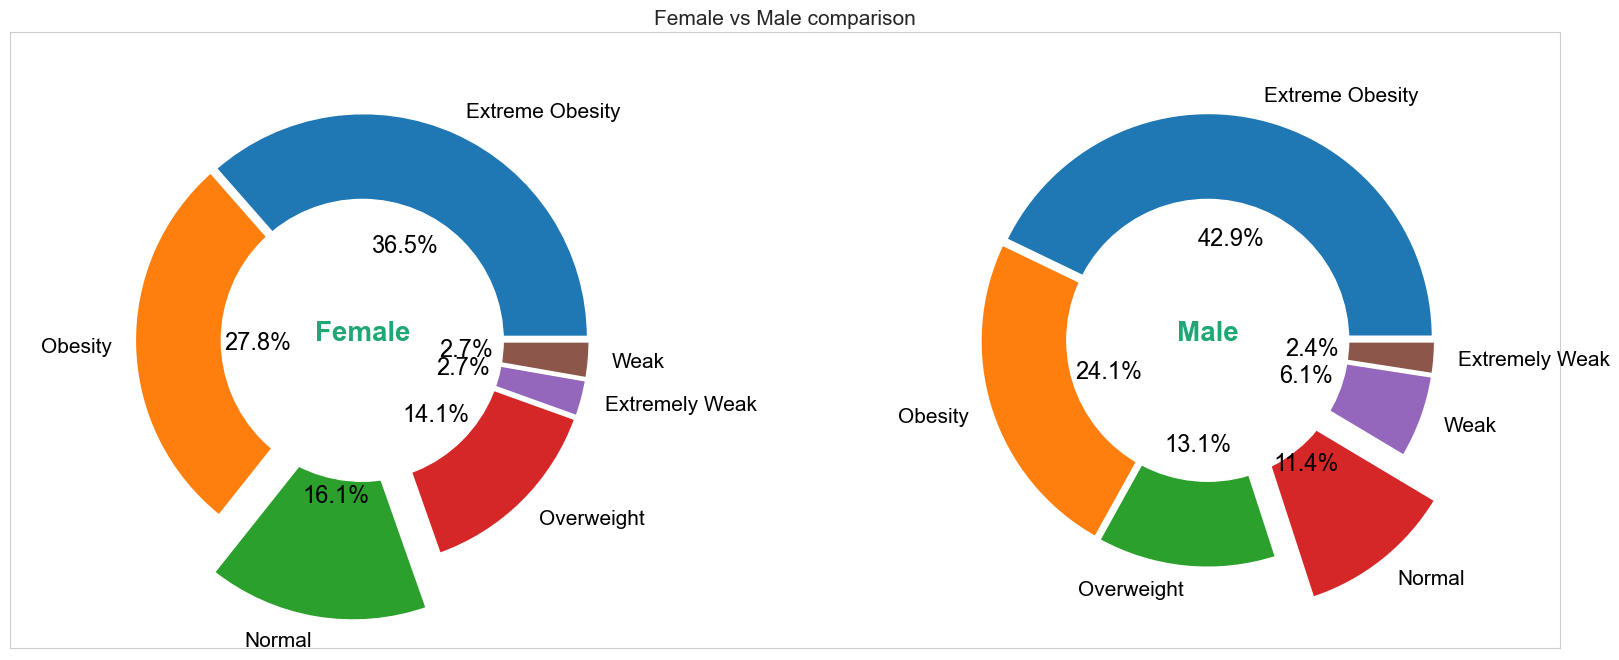

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')


MACHINE LEARNING

In [1]:
!pip install --upgrade pip


In [4]:
!pip install scikit-learn



In [1]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl_enc = LabelEncoder()
data.iloc[:,0] = lbl_enc.fit_transform(data.iloc[:,0])
one_hot_enc_for_gender = OneHotEncoder(categorical_features = [0])
data = one_hot_enc_for_gender.fit_transform(data).toarray()


ModuleNotFoundError: No module named 'sklearn'

In [4]:
pip show scikit-learn


Note: you may need to restart the kernel to use updated packages.
